# 1. 모델의 개요
- 세종특별자치시의 미래 인구수 예측을 위해, 거주자의 특성을 알아보고자 시각화를 진행하였습니다.

# 2. 분석 내용 및 절차

- 세종특별자치시의 총 거주자수를 기간별로 살펴보았습니다. 또한, 행정경계별 인구분포, 월평균 가구소득 등의 특성을 분석하였습니다.

1. 세종특별자치시 총 거주자 추세


2. 지역별 세대원수별 세대수<br/>
    2-1. 지역별 전체 세대수 막대그래프<br/>
    2-2. 지역별 세대원수별 세대수 비율 그래프 (%)

3. 지역별 월평균 가구 소득<br/>
    3-1. 읍면동별 월평균 가구소득<br/>
    3-2. 출범기준 월평균 가구소득<br/>
    
    
4. 연령별 인구현황<br/>
    4-1. 22017~2020 연령별 총 거주자 수 추세<br/>
    4-2. 202012 연령별 지역 분포<br/>

In [1]:
import pathlib
input_path=pathlib.Path('./input')
if not input_path.is_dir():
    input_path.mkdir()
    
for path in list(input_path.glob('*.csv')) + list(input_path.glob('*.geojson')):
    print(path)

input/1.세종시_전유부.csv
input/2.세종시_표제부.csv
input/3.세종시_아파트(매매)_실거래가.csv
input/4.세종시_연립다세대(매매)_실거래가.csv
input/5.세종시_단독다가구(매매)_실거래가.csv
input/6.세종시_오피스텔(매매)_실거래가.csv
input/7.세종시_아파트(전월세)_실거래가.csv
input/8.세종시_연립다세대(전월세)_실거래가.csv
input/9.세종시_단독다가구(전월세)_실거래가.csv
input/10.세종시_오피스텔(전월세)_실거래가.csv
input/11.세종시_상업업무용(매매)_실거래가.csv
input/12.세종시_토지(매매)_실거래가.csv
input/13.세종시_분양권_실거래가.csv
input/14.세종시_상권정보.csv
input/15.세종시_상권정보_업종코드.csv
input/17.세종시_사업체_매출정보.csv
input/18.세종시_개별공시지가(2017~2020).csv
input/20.세종시_전입자수.csv
input/21.세종시_전출자수.csv
input/22.세종시_연령별_인구현황.csv
input/25.세종시_가구_월평균_소비지출액.csv
input/26.세종시_거주기간.csv
input/27.세종시_월평균_가구소득.csv
input/28.세종시_지역별_세대원수별_세대수.csv
input/29.세종시_거주의사(향후).csv
input/16.세종시_사업체_매출정보.geojson
input/19.세종시_연령별_거주인구정보_격자.geojson
input/23.세종시_도로명주소_건물.geojson
input/24.세종시_건축물연면적_격자.geojson
input/30.세종시_법정경계(시군구).geojson
input/31.세종시_법정경계(읍면동).geojson
input/32.세종시_행정경계(읍면동).geojson
input/33.세종시_지적도.geojson


# 2.1 셀 작성

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. 세종특별자치시 총 거주자 추세

In [3]:
세종시_연령별_인구현황=pd.read_csv(input_path.joinpath('22.세종시_연령별_인구현황.csv'))
세종시_연령별_인구현황.set_index('읍면동', inplace=True)

In [4]:
# 남자 데이터만 추출합니다.
연령별_인구현황_남자=세종시_연령별_인구현황.filter(regex='남자')
# 여자 데이터만 추출합니다.
연령별_인구현황_여자=세종시_연령별_인구현황.filter(regex='여자')

In [5]:
# 기간별 총 거주자수만 추출합니다
총인구현황_남자=연령별_인구현황_남자.filter(regex=r'(총_거주자_수)')
총인구현황_여자=연령별_인구현황_여자.filter(regex=r'(총_거주자_수)')

In [6]:
# column에서 201701~202012(년월형식)만을 추출합니다.
Ym_all=[]
for i in 총인구현황_남자.columns:
    i=i[:6]
    Ym_all.append(i)

In [7]:
print(Ym_all)

['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712', '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009', '202010', '202011', '202012']


In [8]:
# column을 통일해 남성 여성 데이터를 합한 총인구 데이터를 생성합니다.
총인구현황_남자.columns=Ym_all
총인구현황_여자.columns=Ym_all

In [9]:
# 모든 행정동의 인구변화가 담긴 데이터에서 세종특별자치시 데이터만을 추출해 따로 저장합니다.
세종특별자치시_총인구현황_남자=총인구현황_남자.iloc[:1, :].reset_index().drop('읍면동', axis=1)
세종특별자치시_총인구현황_여자=총인구현황_여자.iloc[:1, :].reset_index().drop('읍면동', axis=1)
세종특별자치시_총인구현황_남자.index=['남자']
세종특별자치시_총인구현황_여자.index=['여자']

In [10]:
# 남자 여자 데이터를 합한 세종특별자치시 총인구 데이터 생성합니다.
세종특별자치시_총인구현황=pd.concat([세종특별자치시_총인구현황_남자, 세종특별자치시_총인구현황_여자])
세종특별자치시_총인구현황

,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,...,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012
남자,121937,123257,124996,126434,128970,130891,132403,133876,135017,136355,...,171363,171591,171695,171657,172082,172611,173049,174571,175768,176998
여자,121988,123344,125151,126655,129168,131163,132660,134213,135346,136687,...,172274,172476,172544,172550,173000,173497,173852,175323,176541,177707


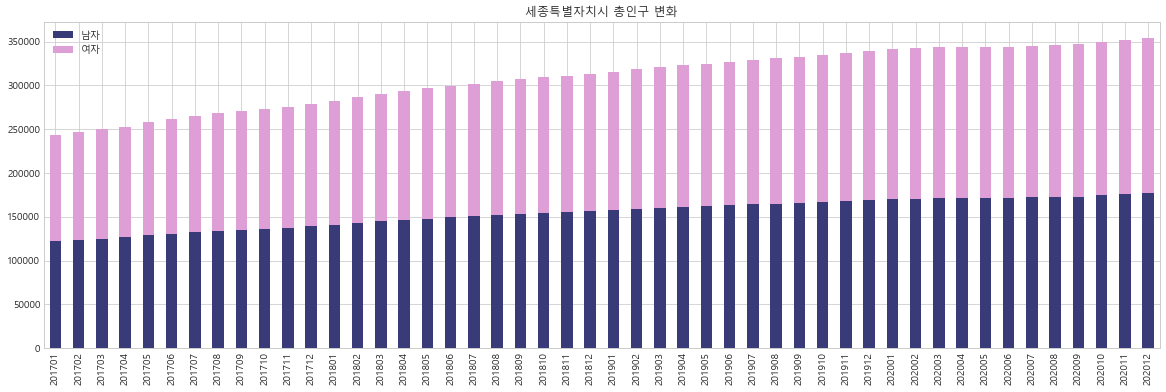

In [11]:
# 세종특별자치시의 총인구 변화를 남자 여자 인구의 누적데이터로 살펴보겠습니다.
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family']='Malgun Gothic'

세종특별자치시_총인구현황.transpose().plot(kind='bar', figsize=(20,6), stacked=True, colormap='tab20b')

plt.title('세종특별자치시 총인구 변화')
plt.xticks(rotation=90)
plt.show()

## 2. 지역별 세대원수별 세대수

### 2-1. 지역별 전체 세대수 막대그래프

In [12]:
# 지역별 세대원수별 세대수 데이터를 불러옵니다.
지역별_세대원수별_세대수=pd.read_csv(input_path.joinpath('28.세종시_지역별_세대원수별_세대수.csv'))
지역별_세대원수별_세대수

,읍면동,계,1인,2인,3인,4인,5인,6인,7인,8인,9인,10인이상
0,조치원읍,19472,8295,4165,3042,2729,944,220,63,9,4,1
1,연 기 면,1445,855,299,133,101,36,11,7,1,2,0
2,연 동 면,1680,834,461,206,114,44,14,5,1,0,1
3,부 강 면,3249,1603,821,420,273,93,34,3,0,0,2
4,금 남 면,4509,2128,1283,589,328,122,41,12,6,0,0
5,장 군 면,3453,1956,806,332,200,106,35,11,6,1,0
6,연 서 면,3834,1863,1022,484,276,129,38,16,3,2,1
7,전 의 면,3045,1551,753,352,244,107,29,8,0,1,0
8,전 동 면,2130,1224,491,213,124,57,15,6,0,0,0
9,소 정 면,1231,565,308,160,127,58,9,1,2,1,0


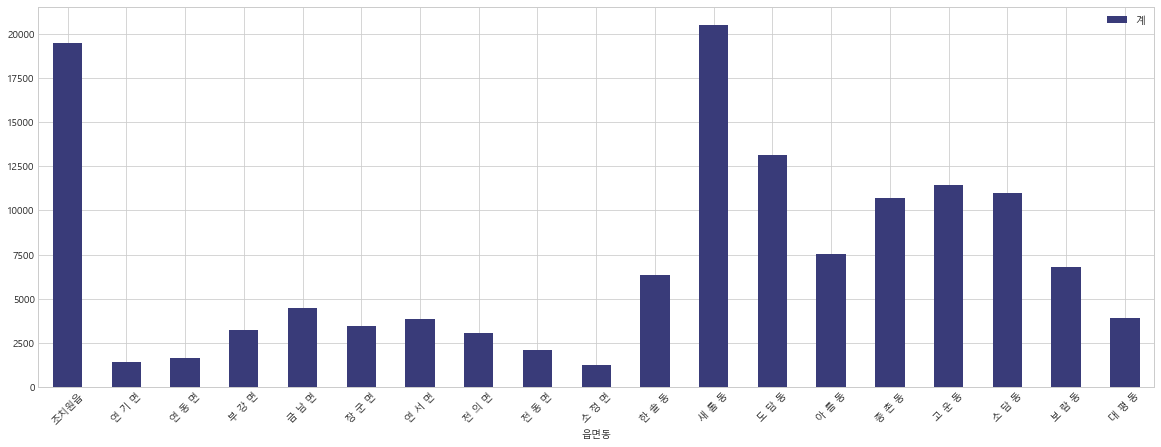

In [13]:
# 지역별 전체 세대수를 막대그래프로 살펴봅니다.
지역별_세대원수별_세대수.plot(kind='bar', x='읍면동', y='계', figsize=(20,7), colormap='tab20b')
plt.xticks(rotation=45, fontsize=10)
plt.show()

### 2-2. 지역별 세대원수별 세대수 비율 그래프 (%)

In [14]:
# 모든 열을 지역별 전체세대수로 나누어 세대원수별 세대수의 비율을 구하는 함수를 정의합니다.
def cal_perc_of_households(data):
    for col in range(2,12):
        data.iloc[:, col] = data.iloc[:,col] / data['계'] * 100
    return data

In [15]:
# 위에서 정의한 함수를 적용해 지역별 세대원수별 세대수의 비율 데이터를 생성합니다.
지역별_세대원수별_세대수_퍼센트=cal_perc_of_households(지역별_세대원수별_세대수)
지역별_세대원수별_세대수_퍼센트.set_index('읍면동', inplace=True)
지역별_세대원수별_세대수_퍼센트.drop('계', axis=1, inplace=True)

In [16]:
지역별_세대원수별_세대수_퍼센트

,1인,2인,3인,4인,5인,6인,7인,8인,9인,10인이상
읍면동,,,,,,,,,,
조치원읍,42.599630,21.389688,15.622432,14.014996,4.847987,1.129827,0.323541,0.046220,0.020542,0.005136
연 기 면,59.169550,20.692042,9.204152,6.989619,2.491349,0.761246,0.484429,0.069204,0.138408,0.000000
연 동 면,49.642857,27.440476,12.261905,6.785714,2.619048,0.833333,0.297619,0.059524,0.000000,0.059524
부 강 면,49.338258,25.269314,12.927054,8.402585,2.862419,1.046476,0.092336,0.000000,0.000000,0.061557
금 남 면,47.194500,28.454203,13.062763,7.274340,2.705700,0.909293,0.266134,0.133067,0.000000,0.000000
장 군 면,56.646394,23.342021,9.614828,5.792065,3.069794,1.013611,0.318564,0.173762,0.028960,0.000000
연 서 면,48.591549,26.656234,12.623891,7.198748,3.364632,0.991132,0.417319,0.078247,0.052165,0.026082
전 의 면,50.935961,24.729064,11.559934,8.013136,3.513957,0.952381,0.262726,0.000000,0.032841,0.000000
전 동 면,57.464789,23.051643,10.000000,5.821596,2.676056,0.704225,0.281690,0.000000,0.000000,0.000000


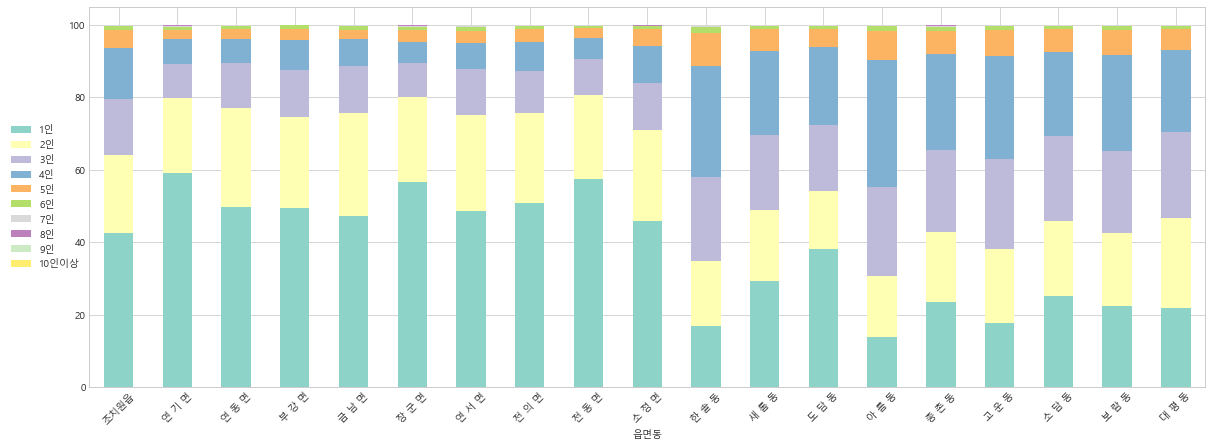

In [17]:
# 지역별 세대원수별 세대수 누적막대그래프를 그려 지역별로 어떤 세대원수의 구성이 높은지 확인합니다.
지역별_세대원수별_세대수_퍼센트.plot(kind='bar', figsize=(20,7), stacked=True, colormap='Set3')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='center right', bbox_to_anchor=(0, 0.5))
plt.show()

## 3. 지역별 월평균 가구 소득

In [18]:
# 세종시 월평균 가구소득 데이터를 불러옵니다.
세종시_월평균_가구소득=pd.read_csv(input_path.joinpath('27.세종시_월평균_가구소득.csv'))
세종시_월평균_가구소득.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   중분류           33 non-null     object 
 1   소분류           33 non-null     object 
 2   100만원 미만      33 non-null     object 
 3   100~200만원 미만  33 non-null     float64
 4   200~300만원 미만  33 non-null     float64
 5   300~400만원 미만  33 non-null     float64
 6   400~500만원 미만  33 non-null     float64
 7   500~600만원 미만  33 non-null     object 
 8   600~700만원 미만  33 non-null     object 
 9   700만원 이상      33 non-null     object 
dtypes: float64(4), object(6)
memory usage: 2.7+ KB


In [19]:
# '-' 값을 0으로 대체하고 float type으로 변환합니다.
세종시_월평균_가구소득.replace('-', 0, inplace=True)
세종시_월평균_가구소득[['100만원 미만', '500~600만원 미만', '600~700만원 미만', '700만원 이상']]=세종시_월평균_가구소득[['100만원 미만', '500~600만원 미만', '600~700만원 미만', '700만원 이상']].astype(float)

In [20]:
# index를 중분류, 소분류로 지정한 후 열의 순서를 조정합니다.
세종시_월평균_가구소득=세종시_월평균_가구소득.pivot_table(index=['중분류', '소분류'])
세종시_월평균_가구소득=세종시_월평균_가구소득[['100만원 미만', '100~200만원 미만', '200~300만원 미만', '300~400만원 미만', '400~500만원 미만', '500~600만원 미만', '600~700만원 미만', '700만원 이상']]

### 3-1. 읍면동별 월평균 가구소득

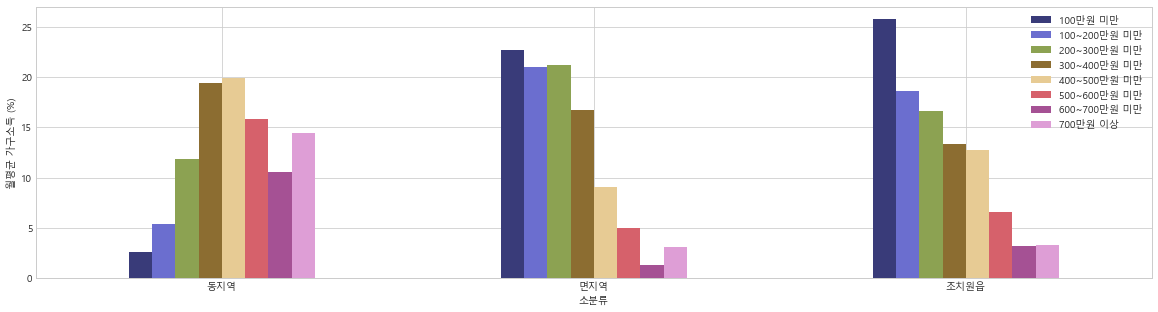

In [21]:
# 읍면동별 월평균 가구소득 비율을 막대그래프로 나타냅니다.
세종시_월평균_가구소득.loc['읍·면·동별'].plot(kind='bar', figsize=(20, 5), colormap='tab20b')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('월평균 가구소득 (%)', fontsize=10)
plt.show()

### 3-2. 출범기준 월평균 가구소득

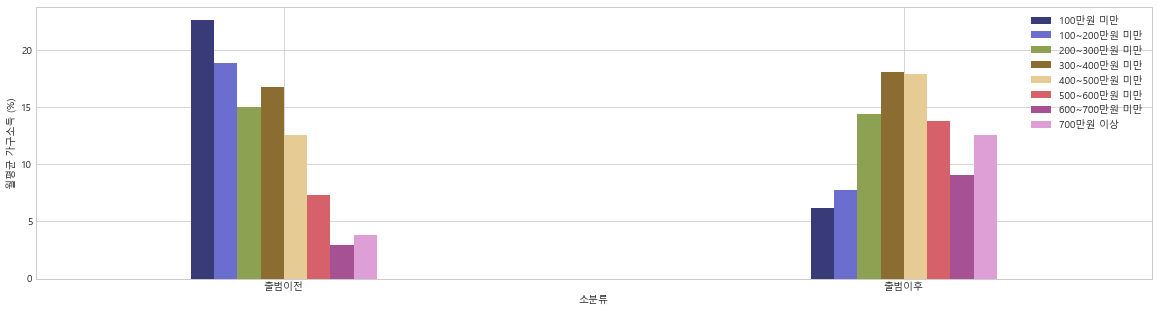

In [22]:
# 출범 기준 월평균 가구소득 비율을 막대그래프로 나타냅니다.
세종시_월평균_가구소득.loc['거주기간별'].plot(kind='bar', figsize=(20, 5), width=0.3, colormap='tab20b')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('월평균 가구소득 (%)', fontsize=10)
plt.show()

## 4. 연령별 인구현황

### 4-1. 2017~2020 연령별 총 거주자 수 추세

In [23]:
# 201701, 201712, 201812, 201912, 202012 데이터만 추출해 간략한 인구 흐름을 살펴봅니다.
인구현황_남자_simplified=연령별_인구현황_남자[['201701_남자(총_거주자_수)', '201712_남자(총_거주자_수)', '201812_남자(총_거주자_수)', '201912_남자(총_거주자_수)', '202012_남자(총_거주자_수)']]
인구현황_여자_simplified=연령별_인구현황_여자[['201701_여자(총_거주자_수)', '201712_여자(총_거주자_수)', '201812_여자(총_거주자_수)', '201912_여자(총_거주자_수)', '202012_여자(총_거주자_수)']]

In [24]:
# column에서 년월형식만을 추출합니다.
Ym_simplified=[]
for i in 인구현황_남자_simplified.columns:
    i=i[:6]
    Ym_simplified.append(i)

In [25]:
# 201701, 201712, 201812, 201912, 202012 세종시 총인구 데이터를 생성합니다.
인구현황_남자_simplified.columns=Ym_simplified
인구현황_여자_simplified.columns=Ym_simplified
세종시_총인구_simplified=인구현황_남자_simplified+인구현황_여자_simplified

In [26]:
세종시_총인구_simplified

,201701,201712,201812,201912,202012
읍면동,,,,,
세종특별자치시,243925,279046,313055,339434,354705
조치원읍,46025,45101,44153,42952,42789
연기면,2680,2723,2645,2520,2671
연동면,3579,3417,3255,3149,3123
부강면,6704,6462,6344,6255,6196
금남면,9639,9298,9062,8682,8790
장군면,6246,6302,6103,6180,6621
연서면,7903,7875,7703,7470,7434
전의면,6407,6255,5987,5761,5590


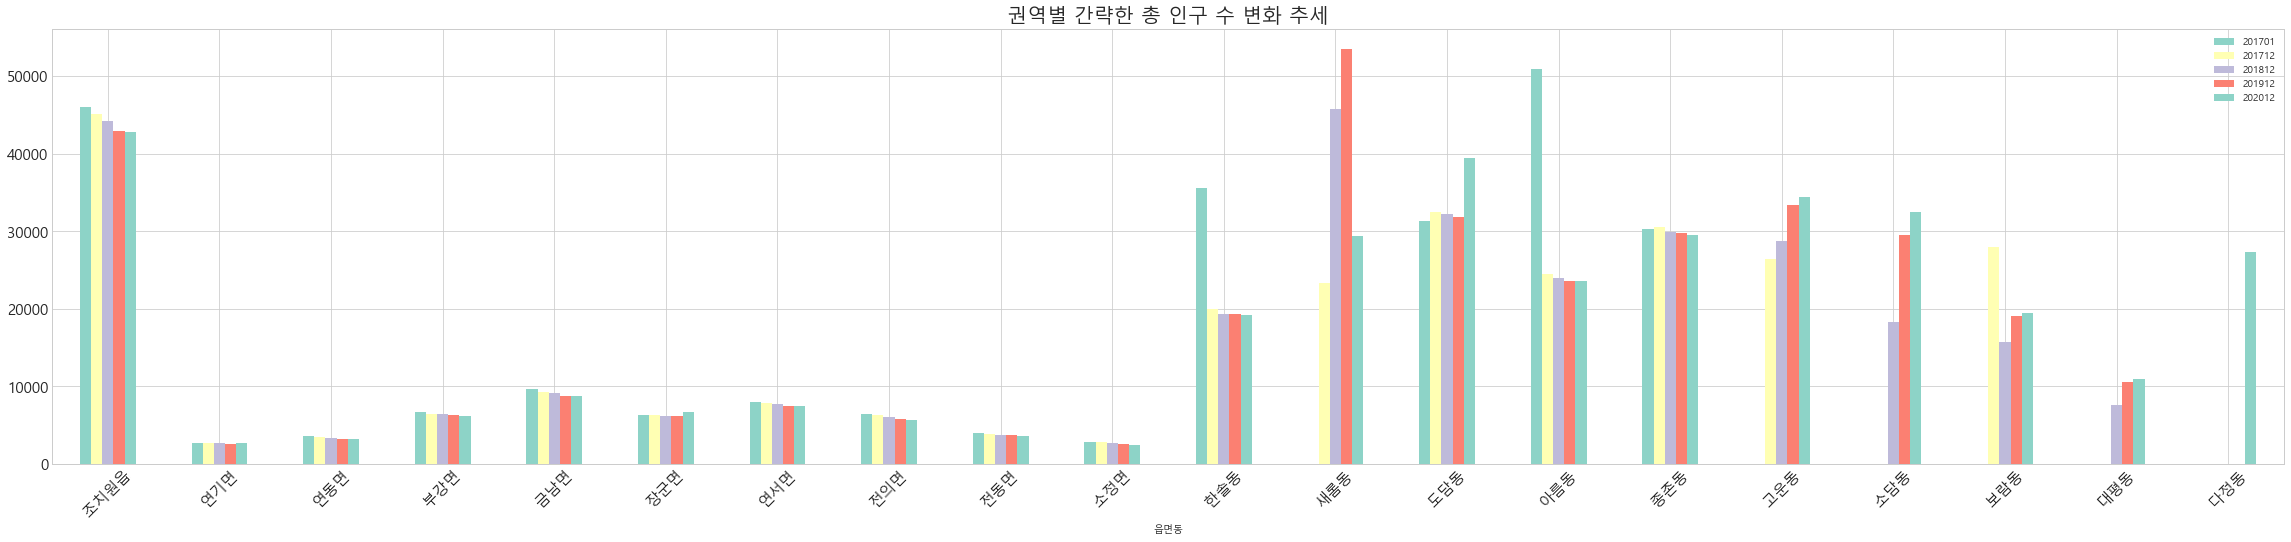

In [27]:
# 권역별 간략한 총 인구 수 변화 추세를 보여주는 막대그래프를 출력합니다.
colors=sns.color_palette('Set3', 4)
세종시_총인구_simplified.iloc[1:, :].plot(kind='bar', figsize=(40,8), color=colors)

plt.title('권역별 간략한 총 인구 수 변화 추세', fontsize=20) 
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [28]:
# 동 단위에서의 인구변화에 확인이 필요해보입니다.
# 위에서 생성했던 '총인구현황_남자', '총인구현황_여자' 데이터를 사용하겠습니다.

In [29]:
# '총인구현황_남자'와 '총인구현황_여자'를 합해 총인구현황 데이터를 생성합니다.
총인구현황=총인구현황_남자+총인구현황_여자

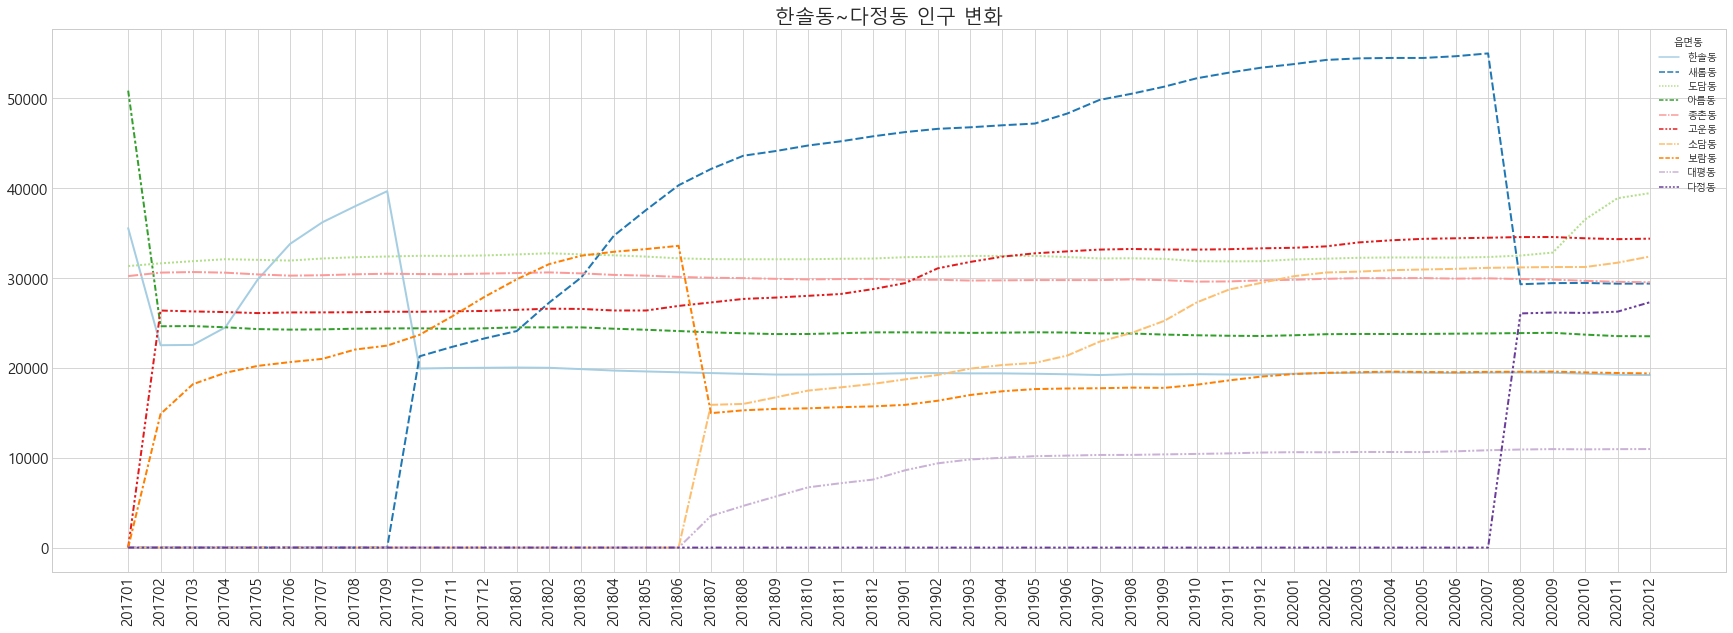

In [30]:
# 위에서 언급한 동 단위에서의 인구변화를 확인하고자 기간별 인구수 lineplot을 그립니다.
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('한솔동~다정동 인구 변화', fontsize=20) 

sns.lineplot(data=총인구현황.iloc[11:, :].transpose(), linewidth=2, palette='Paired')
plt.show()

### 4-2. 202012 연령별 지역 분포

In [31]:
#2020년 12월 거주자수만 데이터로 추출합니다.
인구현황_남자_202012=연령별_인구현황_남자.filter(regex='202012')
인구현황_여자_202012=연령별_인구현황_여자.filter(regex='202012')

In [32]:
# 모든 열을 세종특별시 전체 인구수로 나누어 지역별 연령대의 비율을 구하는 함수를 정의합니다.
def cal_perc_of_population(data):
    for col in range(1,21):
        data.iloc[:, col] = data.iloc[:, col] / data['세종특별자치시']* 100
    return data

In [33]:
# 위에서 정의한 함수를 적용해 지역별 연령대 비율 데이터를 생성합니다.
인구현황_남자_202012_비율=cal_perc_of_population(인구현황_남자_202012.transpose())
인구현황_여자_202012_비율=cal_perc_of_population(인구현황_여자_202012.transpose())

In [34]:
# 연령별 세종특별시 전체 인구수 열은 삭제합니다.
인구현황_남자_202012_비율.drop('세종특별자치시', axis=1, inplace=True)
인구현황_여자_202012_비율.drop('세종특별자치시', axis=1, inplace=True)

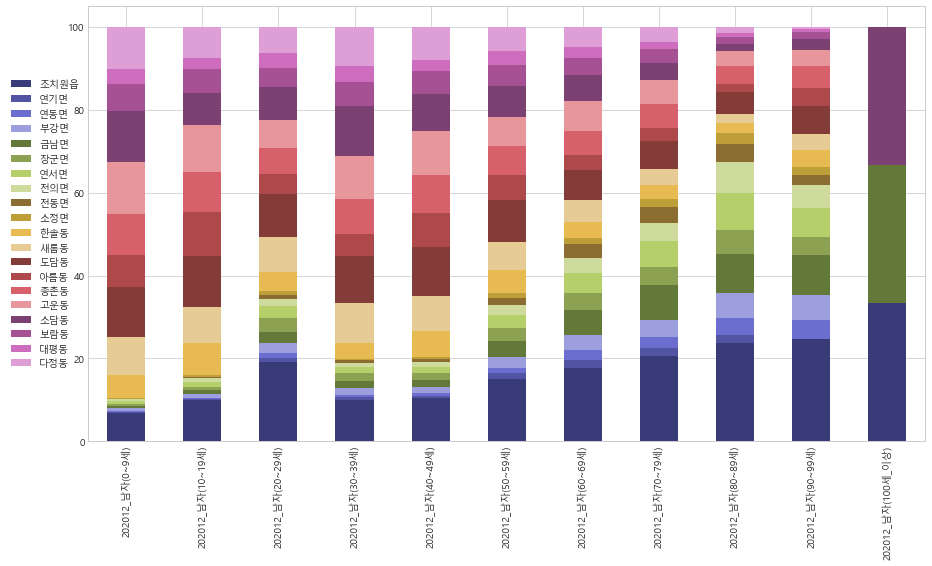

In [35]:
# 남자 인구의 연령대별 지역의 분포를 확인할 수 있는 누적그래프를 그립니다.
인구현황_남자_202012_비율.iloc[2:, :].plot(kind='bar', figsize=(15,8), stacked=True, colormap='tab20b')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='center right', bbox_to_anchor=(0, 0.5))
plt.show()

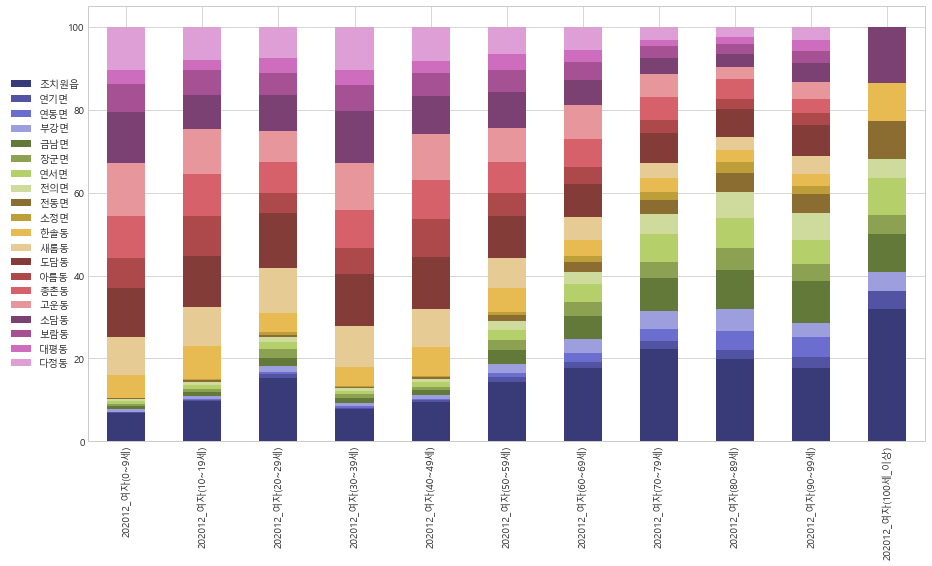

In [36]:
# 여자 인구의 연령대별 지역의 분포를 확인할 수 있는 누적그래프를 그립니다.
인구현황_여자_202012_비율.iloc[2:, :].plot(kind='bar', figsize=(15,8), stacked=True, colormap='tab20b')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='center right', bbox_to_anchor=(0, 0.5))
plt.show()

# 3. 분석 결과

### 세종특별자치시 총 거주자 추세
- 시간에 따른 세종특별자치시 여성과 남성의 인구수의 합으로 총 거주자 수를 살펴보았습니다.
- 전반적으로 꾸준히 **증가**하는 추세를 보이는 것을 확인했습니다.

### 지역역별 세대원수별 세대수
#### 지역별 전체 세대수 막대그래프
- 새롬동, 조치원읍 순으로 세대수가 많이 분포하고 있습니다.
- 동지역에 비해 면지역의 세대수가 **훨씬 적음**을 확인했습니다.

#### 지역별 세대원수별 세대수 비율 그래프 (%)
- 조치원읍 및 면 단위는 1 ・ 2인 가구의 비율이 높은 반면, 동 단위는 3・4인 가구의 비율이 높습니다.

### 지역별 월평균 가구 소득
#### 읍면동별 월평균 가구소득
- 조치원읍과 면지역의 월평균 소득이 동지역에 비해 대체적으로 낮습니다.
- 조치원읍의 100만원 미만 소득 비율이 높은 것은 소득이 적은 20대와 고령인구의 거주 비율이 높은 것의 영향으로 보입니다.

#### 출범기준 월평균 가구소득
- 세종정부청사 출범 이후 월평균 소득수준이 눈에 띄게 상승하였습니다.

### 연령별 인구현황
#### 22017~2020 연령별 총 거주자 수 추세
- 2017년 2월부터 아름동 -> 아름동, 고운동, 보람동
- 2017년 10월부터 한솔동 -> 한솔동, 새롬동
- 2018년 7월부터 보람동 -> 보람동, 소담동, 대평동
- 2020년 8월부터 새롬동 -> 새롬동, 다정동
- lineplot을 통해 위와 같은 행정경계의 분할을 확인하였습니다.

#### 202012 연령별 지역 분포
- 10대 미만 ~ 40대 인구의 대부분이 조치원읍과 동지역에 거주하는 반면, 50대 이상부터는 조치원읍과 면지역 위주로 인구가 거주합니다.
- 조치원읍에는 다른 지역에 비해 비교적 다양한 연령대가 거주합니다.